# Import & Clean Dataset

In [546]:
import pandas as pd
dataset = pd.read_csv('Amazon.csv')
dataset.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131",Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
1,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,₹507,"₹1,208",58%,4.1,"8,131",Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/D-Link-DWA-131-Wireless-...
2,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,₹749,"₹1,339",44%,4.2,"1,79,692",150 Mbps Wi-Fi —— Exceptional wireless speed u...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/31Wb+A3VVd...,https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...
3,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,Electronics|GeneralPurposeBatteries&BatteryCha...,₹399,₹499,20%,4.3,"27,201",Duracell Rechargeable AAA 750mAh batteries sta...,"AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...","T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...","R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...","Works Good,Perfect replacement cell for trimme...","Works good,Bought it to replace my Phillips QT...",https://m.media-amazon.com/images/I/418YrbHVLC...,https://www.amazon.in/Duracell-AAA-750mAh-Rech...
4,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",Computers&Accessories|Accessories&Peripherals|...,₹279,₹375,26%,4.3,"31,534","A comfortable, ambidextrous shape feels good i...","AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...","Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...","R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...","Handy Mouse,Good quality mouse,Good one.,Good,...","Liked this Product,https://m.media-amazon.com/...",https://m.media-amazon.com/images/I/31iFF1Kbkp...,https://www.amazon.in/Logitech-B100-Optical-Mo...


In [547]:
# check for null values
dataset.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [548]:
# check for duplicate values
dataset.duplicated().sum()

0

In [549]:
# convert the rating_count from string to float
dataset['rating_count'] = dataset['rating_count'].str.replace(',', '')
dataset['rating_count'] = dataset['rating_count'].astype(float)
# Filling in missing data for rating_count
dataset['rating_count'].fillna(dataset['rating_count'].median(), inplace=True)
dataset['rating_count'].isnull().sum()

0

In [550]:
# separate the currency sign from the discounted_price and actual_price and convert them to float
dataset['discounted_price'] = dataset['discounted_price'].str.replace('₹', '')
dataset['discounted_price'] = dataset['discounted_price'].str.replace(',', '')
dataset['discounted_price'] = dataset['discounted_price'].astype(float)
dataset['actual_price'] = dataset['actual_price'].str.replace('₹', '')
dataset['actual_price'] = dataset['actual_price'].str.replace(',', '')
dataset['actual_price'] = dataset['actual_price'].astype(float)
# put the ₹ currency in a new column
dataset['currency'] = '₹'
dataset.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,currency
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,507.0,1208.0,58%,4.1,8131.0,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...,₹
1,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories|NetworkingDevices|Networ...,507.0,1208.0,58%,4.1,8131.0,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/D-Link-DWA-131-Wireless-...,₹
2,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories|NetworkingDevices|Networ...,749.0,1339.0,44%,4.2,179692.0,150 Mbps Wi-Fi —— Exceptional wireless speed u...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/31Wb+A3VVd...,https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...,₹
3,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,Electronics|GeneralPurposeBatteries&BatteryCha...,399.0,499.0,20%,4.3,27201.0,Duracell Rechargeable AAA 750mAh batteries sta...,"AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...","T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...","R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...","Works Good,Perfect replacement cell for trimme...","Works good,Bought it to replace my Phillips QT...",https://m.media-amazon.com/images/I/418YrbHVLC...,https://www.amazon.in/Duracell-AAA-750mAh-Rech...,₹
4,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",Computers&Accessories|Accessories&Peripherals|...,279.0,375.0,26%,4.3,31534.0,"A comfortable, ambidextrous shape feels good i...","AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...","Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...","R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...","Handy Mouse,Good quality mouse,Good one.,Good,...","Liked this Product,https://m.media-amazon.com/...",https://m.media-amazon.com/images/I/31iFF1Kbkp...,https://www.amazon.in/Logitech-B100-Optical-Mo...,₹


In [551]:
# for the category column, remove all the strings after the | symbol
dataset['category'] = dataset['category'].str.split('|').str[0]
dataset.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,currency
0,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories,507.0,1208.0,58%,4.1,8131.0,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/I/31+NwZ8gb1...,https://www.amazon.in/D-Link-DWA-131-Wireless-...,₹
1,B002PD61Y4,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,Computers&Accessories,507.0,1208.0,58%,4.1,8131.0,Connects your computer to a high-speed wireles...,"AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...","nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...","R2EJIN3N3L3XKI,R2JMJ8QNG66LV4,R3B46JNPC2T4E7,R...","good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/D-Link-DWA-131-Wireless-...,₹
2,B002SZEOLG,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,Computers&Accessories,749.0,1339.0,44%,4.2,179692.0,150 Mbps Wi-Fi —— Exceptional wireless speed u...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/I/31Wb+A3VVd...,https://www.amazon.in/TP-Link-TL-WN722N-150Mbp...,₹
3,B003B00484,Duracell Plus AAA Rechargeable Batteries (750 ...,Electronics,399.0,499.0,20%,4.3,27201.0,Duracell Rechargeable AAA 750mAh batteries sta...,"AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...","T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...","R5L3FAFS6JXJF,R1VTQ25LXQX5UD,R6RJYAZUM5240,R1S...","Works Good,Perfect replacement cell for trimme...","Works good,Bought it to replace my Phillips QT...",https://m.media-amazon.com/images/I/418YrbHVLC...,https://www.amazon.in/Duracell-AAA-750mAh-Rech...,₹
4,B003L62T7W,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...",Computers&Accessories,279.0,375.0,26%,4.3,31534.0,"A comfortable, ambidextrous shape feels good i...","AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...","Uday Joglekar,Simi Singh,Hi,chirag bansal,Swar...","R3U9FRV2Q625DO,R3EJZ83W9OHW3D,RSH53O0JL66NL,R3...","Handy Mouse,Good quality mouse,Good one.,Good,...","Liked this Product,https://m.media-amazon.com/...",https://m.media-amazon.com/images/I/31iFF1Kbkp...,https://www.amazon.in/Logitech-B100-Optical-Mo...,₹


*New csv file with cleaned data*

In [552]:
# create a new csv file with the cleaned data
dataset.to_csv('Amazon_cleaned.csv', index=False)

**1. Investigate the structure and shape of your dataset.**



*   Structure of Dataset


In [553]:
info = dataset.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   object 
 6   rating               1465 non-null   object 
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o



*   Data Shape (Rows & Columns)


In [554]:
shape = dataset.shape
print("Rows:", shape[0])
print("Columns:", shape[1])

Rows: 1465
Columns: 17


**2. Explore the variables that the dataset has. How are they distributed?**


*   Data Types



In [555]:
types = dataset.dtypes
print(types)

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage     object
rating                  object
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
currency                object
dtype: object


* Using describe() function to print the summary statistics to check data distribution

In [556]:
summary = dataset.describe()

print(summary)


       discounted_price   actual_price   rating_count
count       1465.000000    1465.000000    1465.000000
mean        3125.310874    5444.990635   18277.634812
std         6944.304394   10874.826864   42727.398216
min           39.000000      39.000000       2.000000
25%          325.000000     800.000000    1191.000000
50%          799.000000    1650.000000    5179.000000
75%         1999.000000    4295.000000   17325.000000
max        77990.000000  139900.000000  426973.000000


**3. Compute the mean, sum, range, and other interesting statistics for numeric
columns.**

In [557]:
numeric_columns = dataset.select_dtypes(include=['float64'])

mean = numeric_columns.mean()
sum = numeric_columns.sum()
range = numeric_columns.max() - numeric_columns.min()

print("Mean Values of Columns: ")
print(mean)

print("\nSum Values of Columns: ")
print(sum)

print("\nRange of Columns: ")
print(range)

Mean Values of Columns: 
discounted_price     3125.310874
actual_price         5444.990635
rating_count        18277.634812
dtype: float64

Sum Values of Columns: 
discounted_price     4578580.43
actual_price         7976911.28
rating_count        26776735.00
dtype: float64

Range of Columns: 
discounted_price     77951.0
actual_price        139861.0
rating_count        426971.0
dtype: float64


**4. Explore distributions of numeric columns using histograms etc.**




*   Column: 'discounted_price'



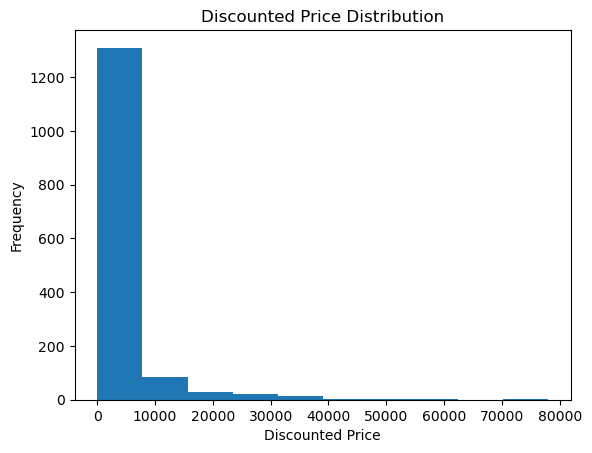

<Figure size 800x500 with 0 Axes>

In [558]:
import matplotlib.pyplot as plt

plt.hist(dataset['discounted_price'])
plt.title("Discounted Price Distribution")
plt.xlabel('Discounted Price')
plt.ylabel('Frequency')
plt.figure(figsize=(8,5))

plt.show()



*   Column: 'actual_price'



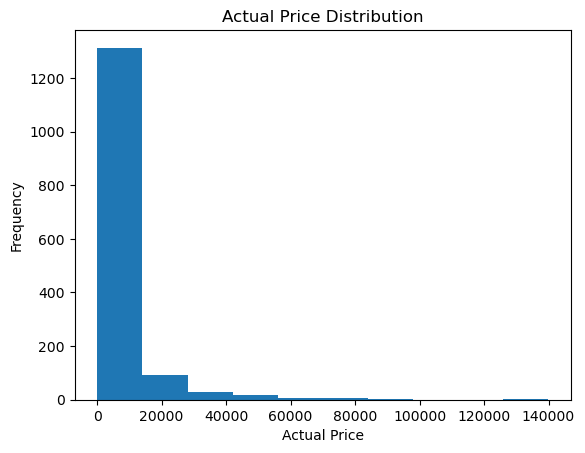

<Figure size 800x500 with 0 Axes>

In [559]:
plt.hist(dataset['actual_price'])
plt.title("Actual Price Distribution")
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.figure(figsize=(8,5))

plt.show()



*   Column: 'rating_count'



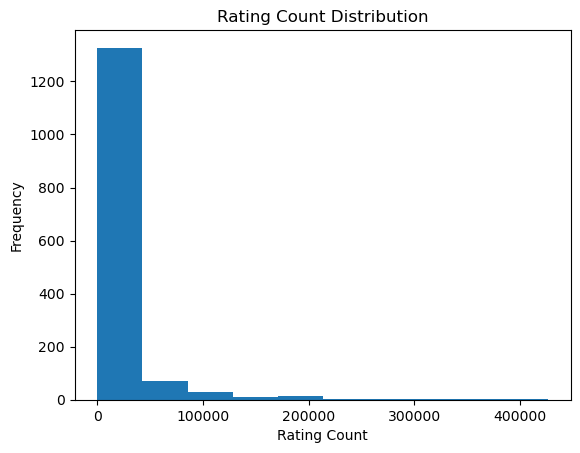

<Figure size 800x500 with 0 Axes>

In [560]:
plt.hist(dataset['rating_count'])
plt.title("Rating Count Distribution")
plt.xlabel('Rating Count')
plt.ylabel('Frequency')
plt.figure(figsize=(8,5))

plt.show()

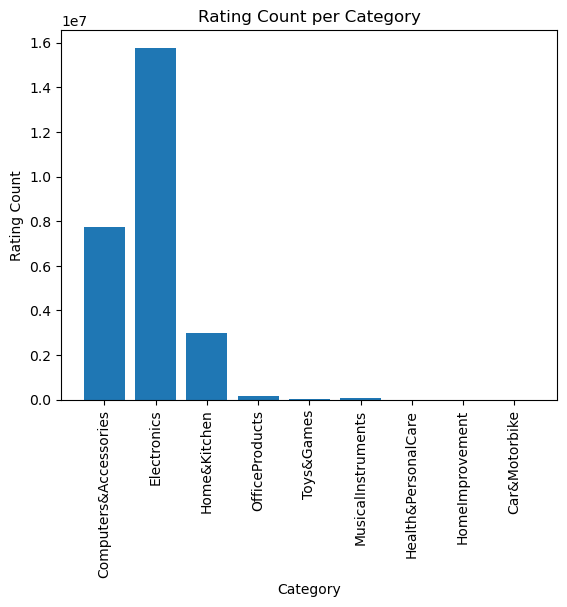

<Figure size 800x500 with 0 Axes>

Rating Count per Category: 
[7739047.0, 15778848.0, 2991069.0, 149675.0, 15867.0, 88882.0, 3663.0, 8566.0, 1118.0]


In [561]:
categories = dataset['category'].unique()
# add rating count  on the category to a list
rating_count = []
for category in categories:
    rating_count.append(dataset[dataset['category'] == category]['rating_count'].sum())
# plot the bar graph
plt.bar(categories, rating_count)
plt.title("Rating Count per Category")
plt.xlabel('Category')
plt.ylabel('Rating Count')
plt.xticks(rotation=90)
plt.figure(figsize=(8,5))

plt.show()

# print the rating count for each category based on the dataset
print("Rating Count per Category: ")
print(rating_count)
